# Regression on Superstore's Product Sales and Profit - A Machine Learning Approach

### NAME : KANMANI A

### Date : 1/08/2025

## Overview of Problem Statement


  The Superstore is experiencing an instability in  their profit margins across product categories, regions, and customer segments. Though there is a steady sales, certain areas of the commerce are underperforming.So Business is seeking an actionable insights in order to get profitability, streamline operations, and improve customer target. By analyzing various factors, the business can gain actionable profit by making changes in pricing strategies, inventory allocation, and promotional effectiveness in order to raise the overall financial performance.

  Superstore is mainly facing profitability inconsistencies that threaten long-term sustainability. Certain product categories yield high revenue but low profit margins, while others show strong margins but limited sales volume. Additionally, discount strategies appear to be misaligned, potentially reducing profits without boosting customer retention.

  The company also lacks clarity on which customer segments contribute most to profit, How regional performance varies over time , Whether shipping delays impact customer satisfaction and repeat purchases , How product bundling or cross-category behavior influences overall profitability .

##  Objectives

To analyse and build a regression model for a online store that predicts the profit of the business based on categories  of the product , quantity , discount , segments , region are all the variables involved.To predict profit using multiple features from the Superstore dataset, and uncover the key drivers of profitability across customer segments, product categories, and regional markets. This regression model will help to identify which feature will influence more profit , also to check whether high sales always translate to high profit .

Here, an model is built to identify how discounting strategies impact profitability and which customer or regional segments are underperforming despite high sales. The primary goal is to build a robust predictive model using regression techniques and translate the findings into actionable business insights for pricing, marketing, and inventory decisions.

## Data Description

**Source**:  From Kaggle ,Link :https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data

**Features**

- **Row ID:** Unique ID for each row.
- **Order ID:** Unique Order ID for each Customer.
- **Order Date:** Order Date of the product.
- **Ship Date:** Shipping Date of the Product.
- **Ship Mode:** Shipping Mode specified by the Customer.

- **Customer ID:** Unique ID to identify each Customer.
- **Customer Name:** Name of the Customer.
- **Segment:** The segment where the Customer belongs.
- **Country:** Country of residence of the Customer.
- **City:** City of residence of of the Customer.
- **State:** State of residence of the Customer.
- **Postal Code:** Postal Code of every Customer.
- **Region:** Region where the Customer belong.

- **Product ID:** Unique ID of the Product.
- **Category:** Category of the product ordered.
- **Sub-Category:** Sub-Category of the product ordered.
- **Product Name:** Name of the Product
- **Sales:** Price of the Product.
- **Quantity:** Quantity of the Product.
- **Discount:** Discount provided.

- **Profit:** Profit that happens to the store which is the Target variable for Regression model.

### Importing library files

In [386]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor ,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

### Data Collection

### Loading the DataSet

In [387]:
data = pd.read_csv(r'C:\Users\netha\Capstone project\Superstore.csv', encoding='ISO-8859-1')

In [388]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Converting data into DataFrame


In [389]:
df=pd.DataFrame(data)

In [390]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [391]:
df.head(10)   #details of top 10 row

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [392]:
df.tail(10)  #details of last 10 row

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,5/17/2015,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,9/29/2016,10-03-2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,05-04-2017,05-09-2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


#### Displaying information

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

#### Checking shape of data

In [394]:
df.shape

(9994, 21)

#### Describing the details of the dataset

In [395]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Displaying columns

In [396]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Checking Datatypes

In [397]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [398]:
print(df['Profit'].dtype)

float64


## Data Cleaning and Preprocessing

#### Checking for Duplicates

In [399]:
df.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [400]:
df.duplicated().sum()

np.int64(0)

**No duplicate values found in the Dataset**

#### Finding and Handling null values

In [401]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**No Null values found in the dataset**

In [402]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Renaming Column names

In [403]:
df=df.rename(columns={'Row ID': 'Row_ID',
                      'Order Date': 'Order_date',
                      'Order ID':'Order_ID',
                      'Ship Date ':'Ship_date',
                      'Ship Mode':'Ship_mode',
                      'Postal Code':'Postal_code'})

In [404]:
df=df.rename(columns={'Customer ID': 'Customer_ID  ',
                      'Customer Name':'Customer_name',
                      'Product ID':'Product_ID',
                      'Sub-Category':'Sub_Category',
                      'Product Name':'Product_name'})

In [405]:
df

,Row_ID,Order_ID,Order_date,Ship Date,Ship_mode,Customer_ID,Customer_name,Segment,Country,City,...,Postal_code,Region,Product_ID,Category,Sub_Category,Product_name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [406]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_date', 'Ship Date', 'Ship_mode',
       'Customer_ID  ', 'Customer_name', 'Segment', 'Country', 'City', 'State',
       'Postal_code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Finding unique values in a particular column

In [407]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

#### Filtering the values of a column

In [408]:
filtered_df=df[df['Category']=='Technology']

In [409]:
filtered_df

,Row_ID,Order_ID,Order_date,Ship Date,Ship_mode,Customer_ID,Customer_name,Segment,Country,City,...,Postal_code,Region,Product_ID,Category,Sub_Category,Product_name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conferenceÿphoneÿ- Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,8/27/2014,09-01-2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,1/16/2016,1/20/2016,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imationÿ8GB Mini TravelDrive USB 2.0ÿFlash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,12-08-2016,12-10-2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,9/22/2016,9/28/2016,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,9/29/2016,10-03-2016,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,11/17/2017,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


#### Sorting

In [410]:
sort_s=df.sort_values(by='Sales')

In [411]:
sort_s

,Row_ID,Order_ID,Order_date,Ship Date,Ship_mode,Customer_ID,Customer_name,Segment,Country,City,...,Postal_code,Region,Product_ID,Category,Sub_Category,Product_name,Sales,Quantity,Discount,Profit
4101,4102,US-2017-102288,6/19/2017,6/23/2017,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100
9292,9293,CA-2017-124114,03-02-2017,03-02-2017,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,...,76706,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,0.8,-0.9452
8658,8659,CA-2016-168361,6/21/2016,6/25/2016,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,...,60623,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,0.8,-1.3376
4711,4712,CA-2014-112403,3/31/2014,3/31/2014,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,...,19120,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,0.7,-0.5964
2106,2107,US-2014-152723,9/26/2014,9/26/2014,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,...,75150,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,0.8,-1.4016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
6826,6827,CA-2016-118689,10-02-2016,10-09-2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760


#### Grouping and finding the mean value

In [412]:
grouped_df=df.groupby('Category')['Profit'].mean()

In [413]:
grouped_df

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

### Statistical Analysis

In [414]:
mean_speed=df['Profit'].mean()   #average profit 
mean_speed

np.float64(28.65689630778467)

In [415]:
median_speed=df['Profit'].median()    #middle value of profit
median_speed

np.float64(8.6665)

The profits here are small or even negative.A few transactions bring very large profits.
👉 That’s an imbalanced regression target.

As Its a Imbalanced dataset ,to balance it initially, EDA process is done.

### EDA - Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Numerical Plotting

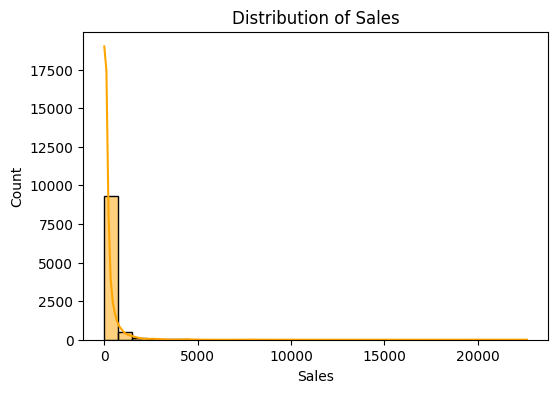

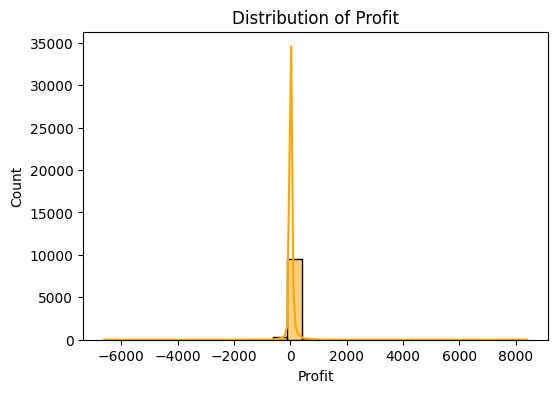

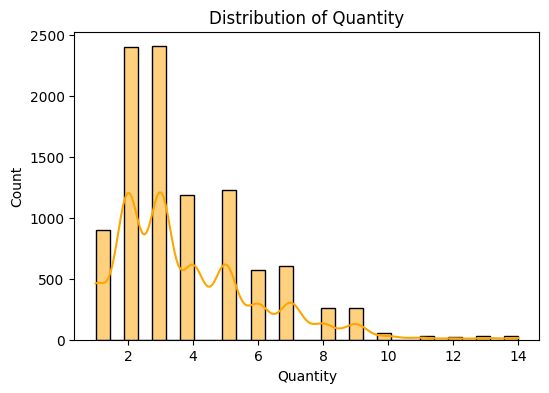

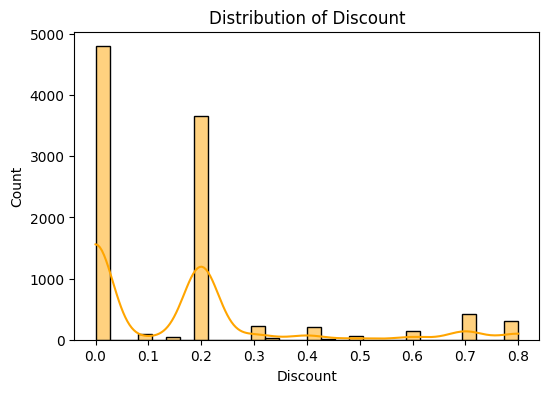

In [416]:
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

for col in num_cols:                                               #Loop over each numeric column.
    plt.figure(figsize=(6,4))                                      #sets plot size
    sns.histplot(df[col], kde=True, bins=30, color='Orange')       #histogram to show the distribution shape , bins represents better granularity
    plt.title(f"Distribution of {col}")                            #Name of the Plot
    plt.show()

### Categorical Plotting

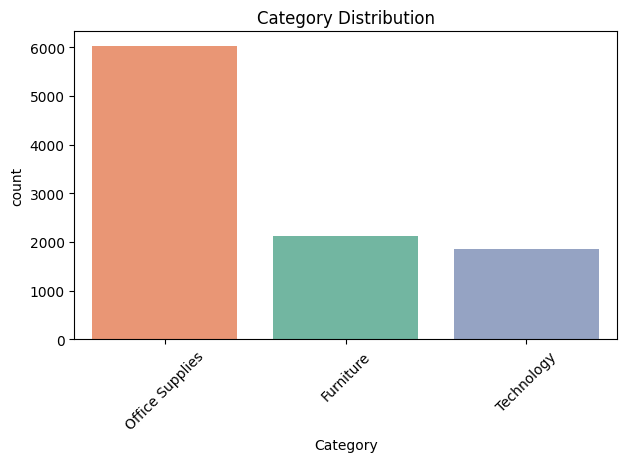

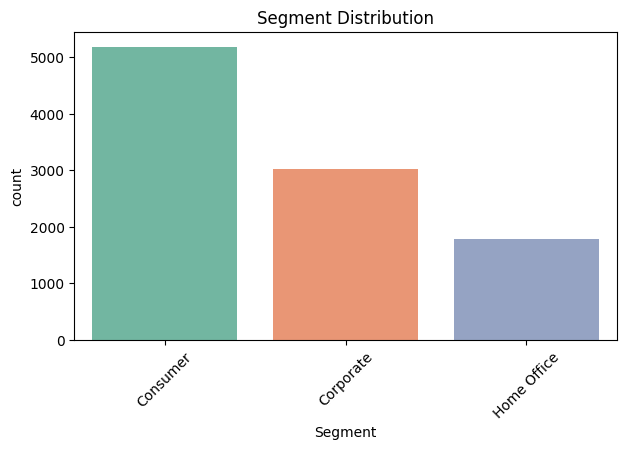

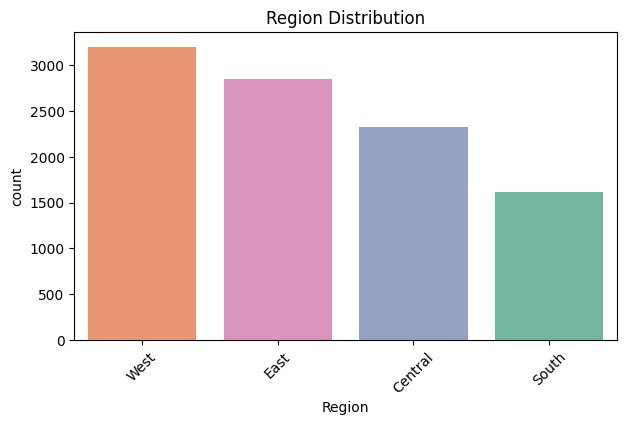

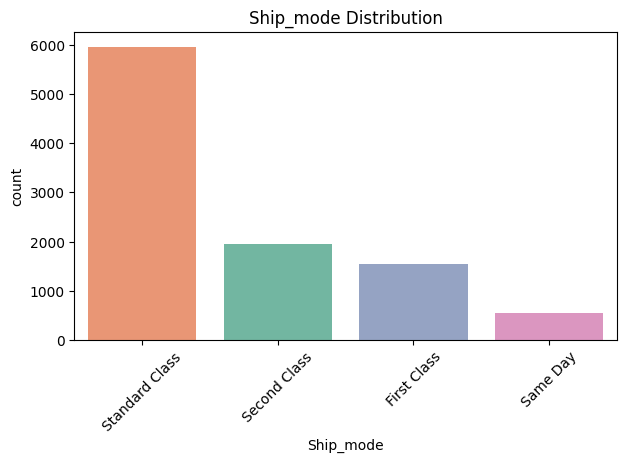

In [417]:
cat_cols = ['Category', 'Segment', 'Region', 'Ship_mode']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index,hue=col, palette="Set2")  ## same variable for color mapping
    plt.title(f"{col} Distribution")                                                           ##Name of the plot
    plt.xticks(rotation=45)                                                                    ##controls the tick positions and labels on the x-axis
    plt.show()

**The above plots tells which categories that tend to be more profitable or less profitable.**

## Bivariate Analysis

### Plot for Profit with respect to Sales

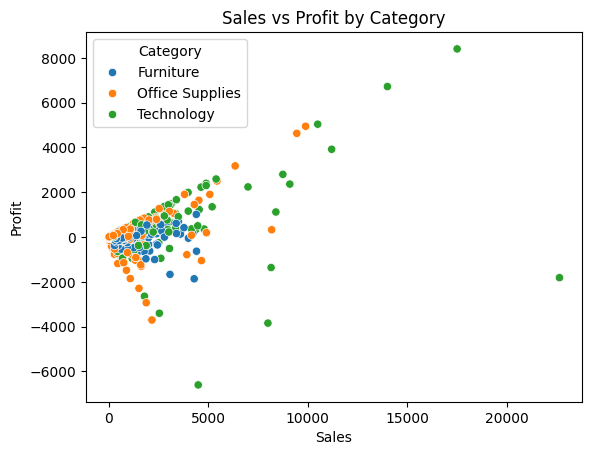

In [418]:
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)   #hue - dots are colored differently for Furniture, Technology, and Office Supplies.
plt.title("Sales vs Profit by Category") #sets the chart title
plt.show()

**The scatter plot points bunch up near the origin which tells that sale values are extreme over there.**

### Plot for Profit with respect to Discount

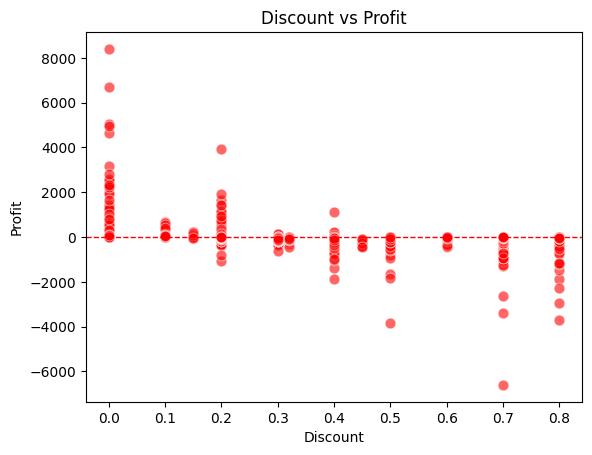

In [419]:
sns.scatterplot(x='Discount', y='Profit', data=df,alpha=0.6, s=60, color="red") #alpha -makes points slightly transparent to see overlapping points
plt.title("Discount vs Profit")                                                 #Name of the plot
plt.axhline(0, color='red', linestyle='--', linewidth=1)                        # show zero profit line
plt.show()

**From the above plot we can tell that its relationship is Non-Linear (i.e)  Higher the discount , Bigger the loss.**

### Plot for Profit with respect to Category

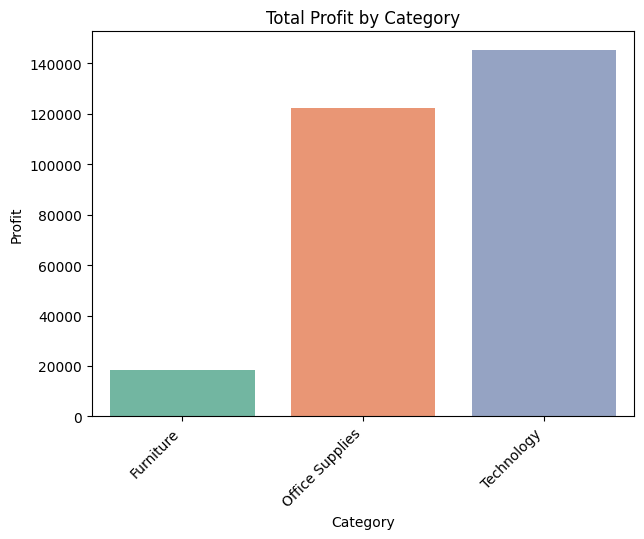

In [420]:
category_profit = df.groupby('Category', as_index=False)['Profit'].sum()      #Aggregate function
plt.figure(figsize=(7,5))
sns.barplot(x='Category', y='Profit', data=category_profit, palette="Set2")    #bar plotting
plt.title("Total Profit by Category")
plt.xticks(rotation=45, ha='right')                                            #ha='right' means very long names align neatly.
plt.show()

#### Expected insights of bar plot

- Technology usually shows the highest total profit.
- Furniture often has low or even negative total profit in some datasets because of big discounts.
- Office Supplies tends to be profitable but not as much as Technology.

### Performing KDE Plots

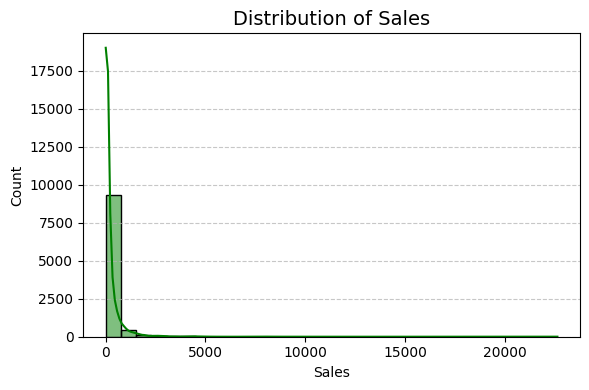

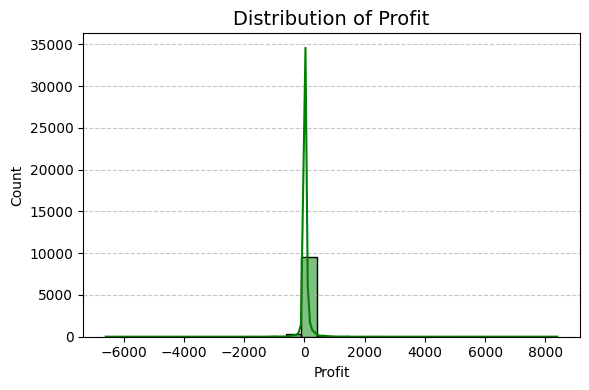

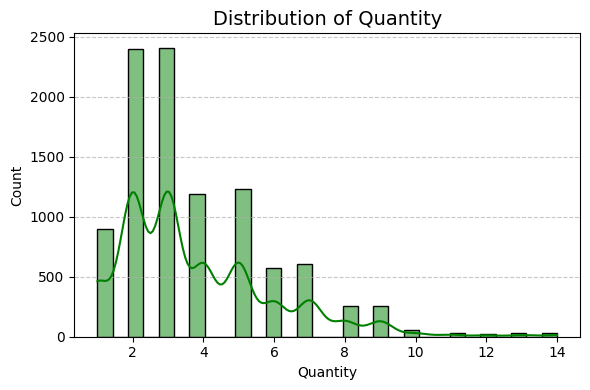

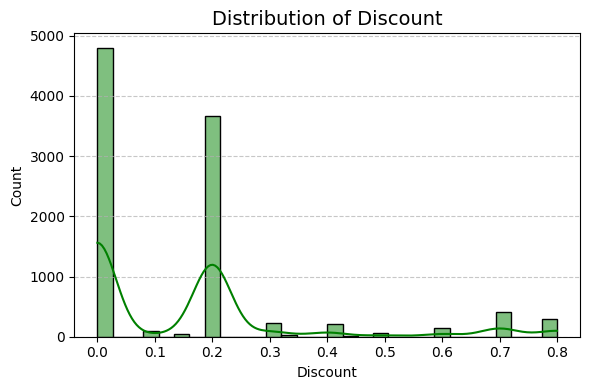

In [421]:
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='green', edgecolor='black')
    plt.title(f"Distribution of {col}",fontsize=14)
    plt.grid(axis='y',linestyle='--', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### Pie Chart

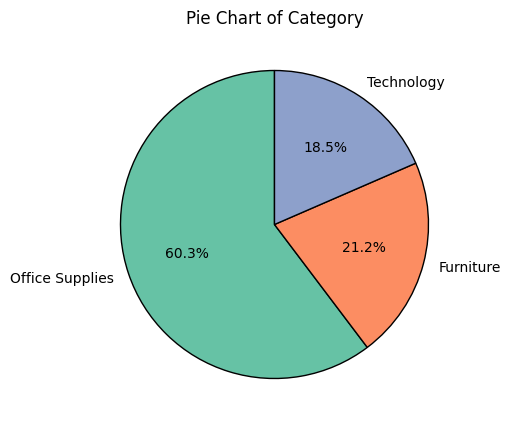

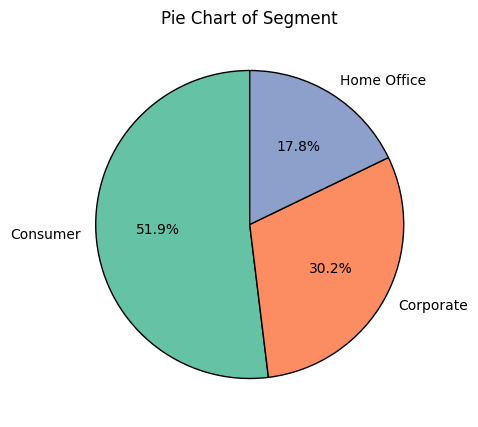

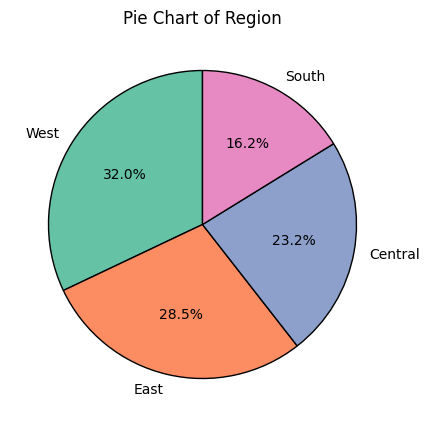

In [422]:
cat_cols = ['Category', 'Segment', 'Region']
for col in cat_cols:
    plt.figure(figsize=(5,5))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"),wedgeprops={'edgecolor': 'black'}) #wedgeprops-Thin black outline for clarity
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")                                                                                      # Remove y-label
    plt.show()

- **Category** - 0-Furniture ,1- Technology, 2-Office Supplies
- **Segment** - 0-Consumer, 1- Corperate , 2- Home Office
- **Region** -  0-Central, 1-East, 2-West , 3-South

#### Removing Outliers

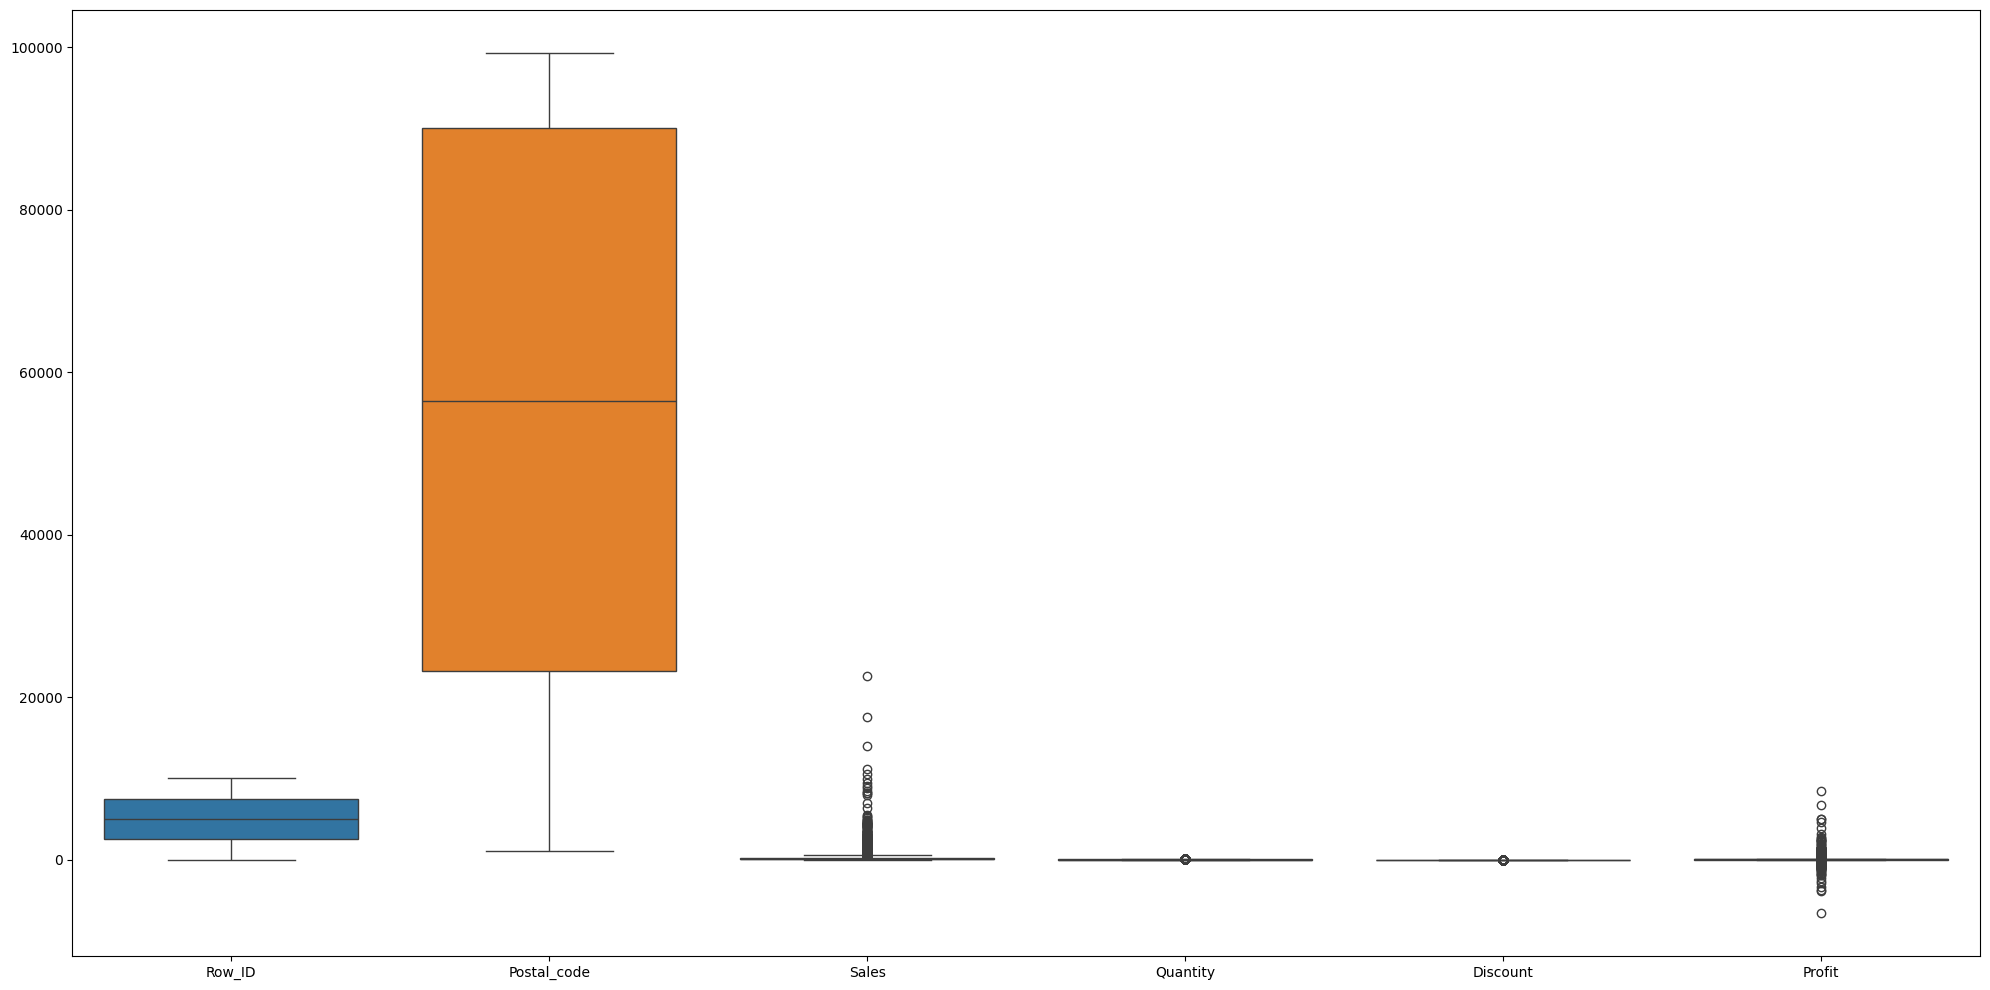

In [423]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)        
plt.tight_layout()
plt.show()

#### Handling Outliers by using IQR

In [424]:
def fix_outliers_iqr(df):                                           # Function to apply IQR method to fix outliers
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR                                 # Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

In [425]:
df1=fix_outliers_iqr(df)
df1

,Row_ID,Order_ID,Order_date,Ship Date,Ship_mode,Customer_ID,Customer_name,Segment,Country,City,...,Postal_code,Region,Product_ID,Category,Sub_Category,Product_name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2.0,0.00,41.913600
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.930,3.0,0.00,70.816875
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,0.00,6.871400
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,498.930,5.0,0.45,-39.724125
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.20,2.516400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3.0,0.20,4.102800
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2.0,0.00,15.633200
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2.0,0.20,19.393200
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4.0,0.00,13.320000


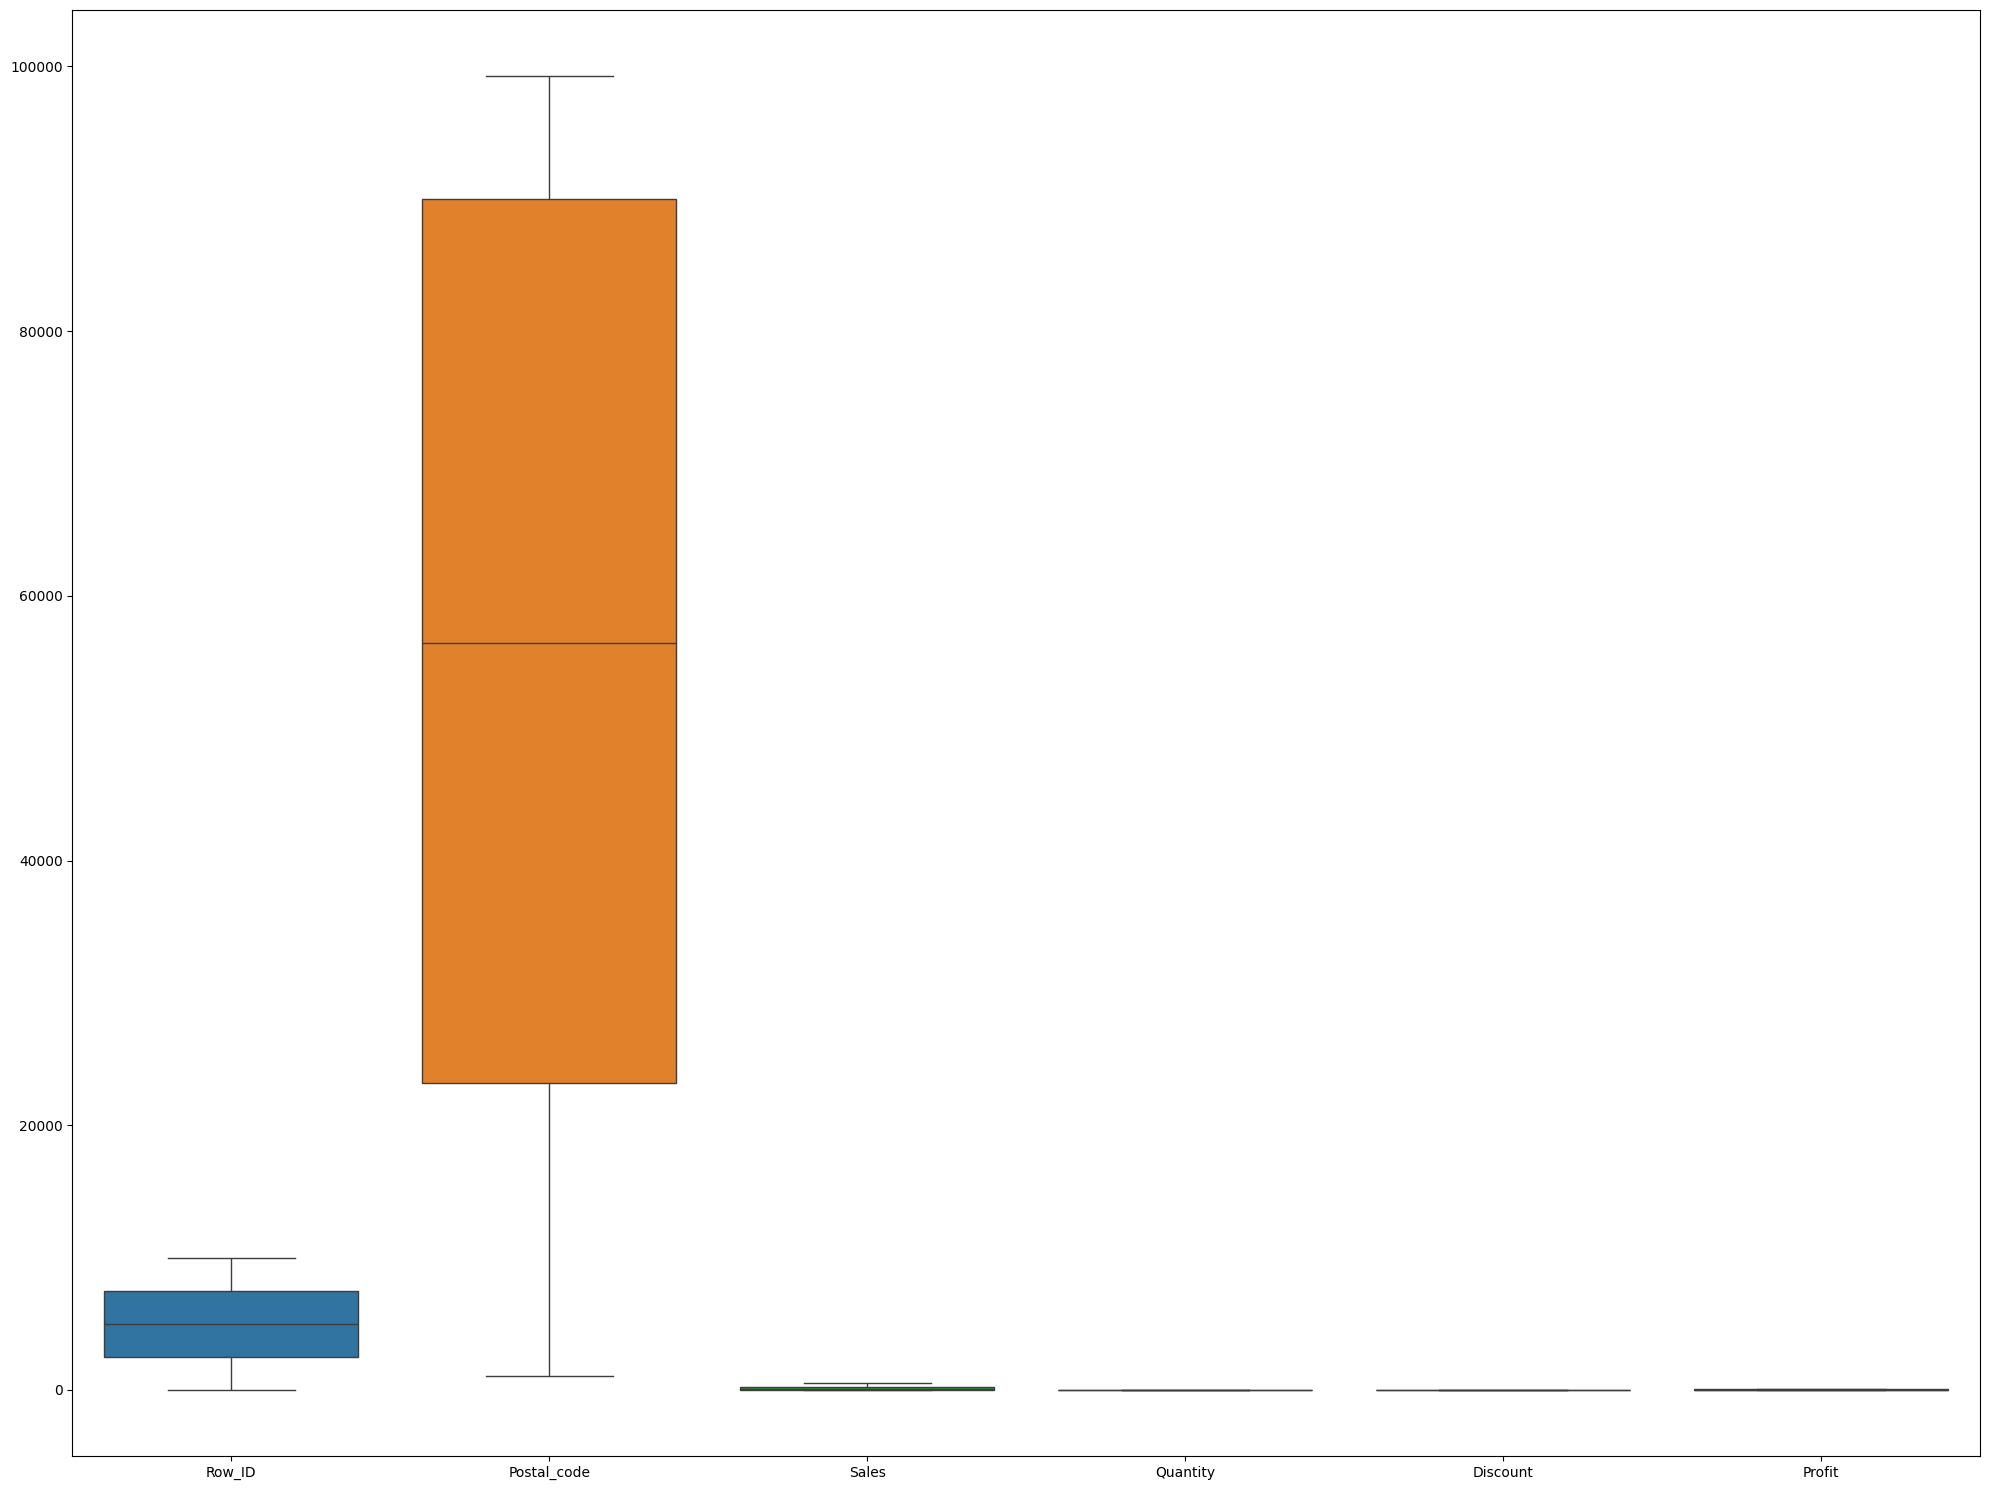

In [426]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df1)
plt.tight_layout()
plt.show()

### Correlation

In [427]:
cor = df1.corr(numeric_only=True)
cor

,Row_ID,Postal_code,Sales,Quantity,Discount,Profit
Row_ID,1.000000,0.009671,-0.007105,-0.004431,0.012400,-0.009215
Postal_code,0.009671,1.000000,-0.008668,0.013351,0.061746,-0.031795
Sales,-0.007105,-0.008668,1.000000,0.267666,-0.014419,0.450223
Quantity,-0.004431,0.013351,0.267666,1.000000,0.004406,0.194459
Discount,0.012400,0.061746,-0.014419,0.004406,1.000000,-0.515247
Profit,-0.009215,-0.031795,0.450223,0.194459,-0.515247,1.000000


In [428]:
cor['Profit'].sort_values(ascending=False)

Profit         1.000000
Sales          0.450223
Quantity       0.194459
Row_ID        -0.009215
Postal_code   -0.031795
Discount      -0.515247
Name: Profit, dtype: float64

### Heatmap to show Correlation

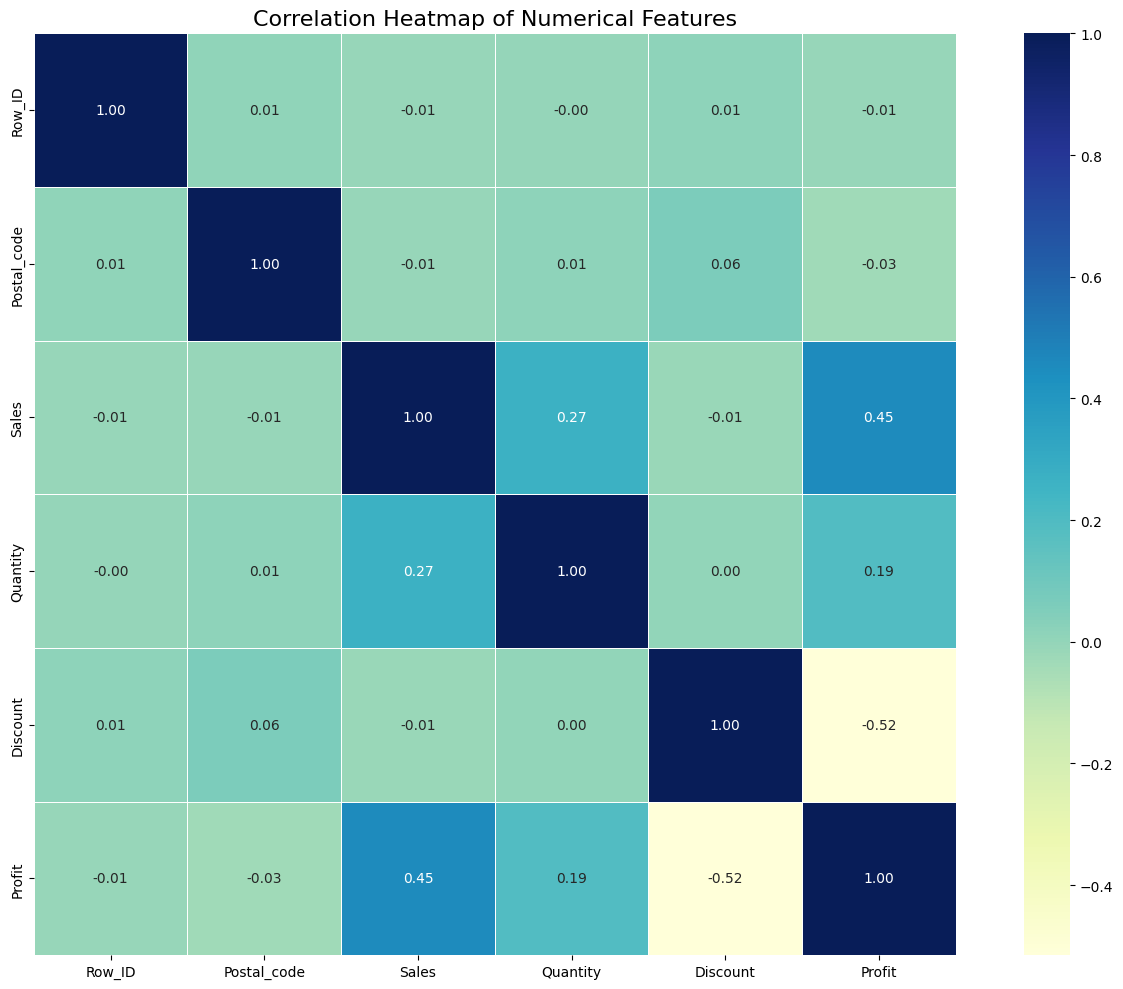

In [429]:
plt.figure(figsize=(14, 10))   
sns.heatmap(cor, 
            annot=True, 
            fmt=".2f", 
            cmap='YlGnBu', 
            linewidths=0.5, 
            cbar=True,         #display the color bar on the side.
            square=True)
# Displaying the heatmap
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### Below are some Observation from the Dataset

- **Sales vs Profit** -Often shows a moderate positive correlation (e.g., 0.45–0.60) which means higher sales generally bring higher profits, but not always — discounts and costs affect this.

- **Discount vs Profit**-Typically a strong negative correlation (e.g., around -0.6)which means higher discounts reduce profit — aggressive discounting may lead to losses.

- **Quantity vs Sales**-Usually a weak positive correlation (e.g., 0.2–0.3) which means selling more units slightly increases sales revenue, but sales also depend on price.

- **Quantity vs Profit**-Could be near zero or negative which means higher quantities don’t always guarantee more profit for bulk discounts or low-margin products.
- **Discount vs Sales**-Often a weak positive correlation which means discounts may boost sales volume, but not enough to ensure more profit.

### Checking for Skewness

In [430]:
df1= df1.select_dtypes(include='number')
df1

,Row_ID,Postal_code,Sales,Quantity,Discount,Profit
0,1,42420,261.960,2.0,0.00,41.913600
1,2,42420,498.930,3.0,0.00,70.816875
2,3,90036,14.620,2.0,0.00,6.871400
3,4,33311,498.930,5.0,0.45,-39.724125
4,5,33311,22.368,2.0,0.20,2.516400
...,...,...,...,...,...,...
9989,9990,33180,25.248,3.0,0.20,4.102800
9990,9991,92627,91.960,2.0,0.00,15.633200
9991,9992,92627,258.576,2.0,0.20,19.393200
9992,9993,92627,29.600,4.0,0.00,13.320000


In [431]:
skew = df1.skew().sort_values(ascending=False)      #Skew function
skew

Sales          1.219825
Discount       0.959192
Quantity       0.927043
Profit         0.415481
Row_ID         0.000000
Postal_code   -0.128526
dtype: float64

**The profits are small or even negative.A few transactions bring very large profits.
👉 That’s an imbalanced regression.**

### Skewness by power transformer method

In [432]:
pt=PowerTransformer(method='yeo-johnson')                              # Apply PowerTransformer
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns

**Handles both negative and positive values safely.**

In [433]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [434]:
df_transformed.skew()      ## Check transformed data

Row_ID        -0.290306
Postal_code   -0.311273
Sales         -0.009963
Quantity       0.009983
Discount       0.231074
Profit         0.194920
dtype: float64

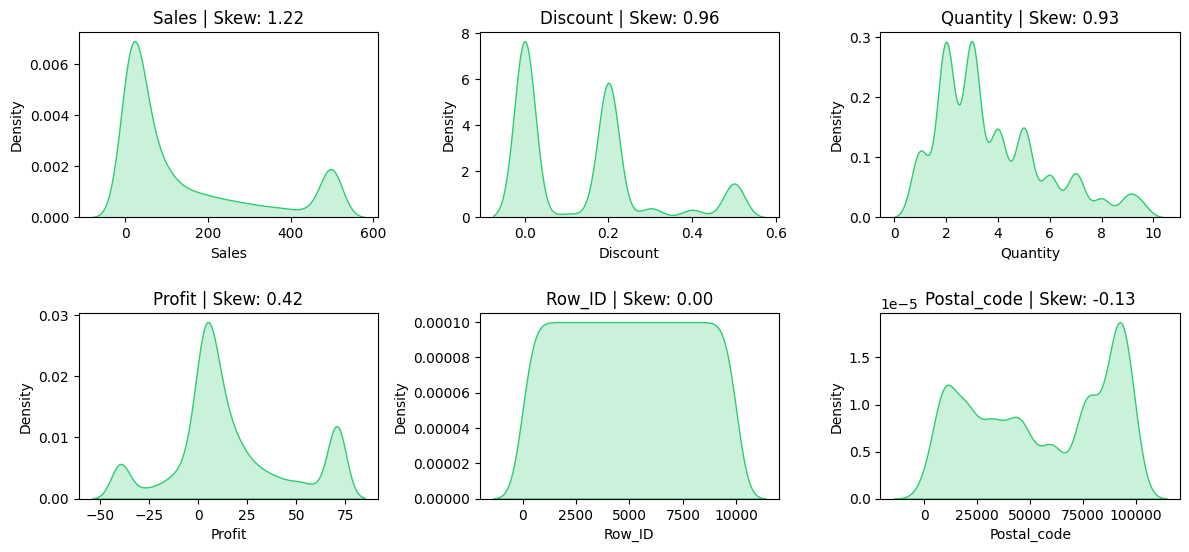

In [435]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(skew.index, 1):                               
    plt.subplot(3, 3, i)                                              # 3 rows, 3 columns grid
    sns.kdeplot(df[col], fill=True, color='#2ECC71')                  #kde plotting
    plt.title(f"{col} | Skew: {skew[col]:.2f}", fontsize=12)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [436]:
df_transformed

,Row_ID,Postal_code,Sales,Quantity,Discount,Profit
0,-2.187328,-0.289022,1.036897,-0.851383,-0.990194,0.873043
1,-2.184328,-0.289022,1.497012,-0.164204,-0.990194,1.792182
2,-2.181611,1.044895,-0.920082,-0.851383,-0.990194,-0.270973
3,-2.179088,-0.586557,1.497012,0.768903,1.605238,-2.049494
4,-2.176710,-0.586557,-0.647246,-0.851383,0.692206,-0.419174
...,...,...,...,...,...,...
9989,1.553271,-0.590996,-0.568138,-0.164204,0.692206,-0.364781
9990,1.553537,1.110510,0.303966,-0.851383,-0.990194,0.020578
9991,1.553803,1.110510,1.027678,-0.851383,0.692206,0.144121
9992,1.554068,1.110510,-0.463450,0.354355,-0.990194,-0.055823


## Feature Engineering

#### Encoding

**Label encoding**

In [437]:
encoder = LabelEncoder()
for col in ['Category', 'Sub_Category', 'Segment', 'Region', 'Ship_mode']:
    df[col] = encoder.fit_transform(df[col])

In [438]:
df.head()

,Row_ID,Order_ID,Order_date,Ship Date,Ship_mode,Customer_ID,Customer_name,Segment,Country,City,...,Postal_code,Region,Product_ID,Category,Sub_Category,Product_name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,2,CG-12520,Claire Gute,0,United States,Henderson,...,42420,2,FUR-BO-10001798,0,4,Bush Somerset Collection Bookcase,261.960,2.0,0.00,41.913600
1,2,CA-2016-152156,11-08-2016,11-11-2016,2,CG-12520,Claire Gute,0,United States,Henderson,...,42420,2,FUR-CH-10000454,0,5,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.930,3.0,0.00,70.816875
2,3,CA-2016-138688,06-12-2016,6/16/2016,2,DV-13045,Darrin Van Huff,1,United States,Los Angeles,...,90036,3,OFF-LA-10000240,1,10,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,0.00,6.871400
3,4,US-2015-108966,10-11-2015,10/18/2015,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311,2,FUR-TA-10000577,0,16,Bretford CR4500 Series Slim Rectangular Table,498.930,5.0,0.45,-39.724125
4,5,US-2015-108966,10-11-2015,10/18/2015,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,33311,2,OFF-ST-10000760,1,14,Eldon Fold 'N Roll Cart System,22.368,2.0,0.20,2.516400


#### Onehot encoding

In [439]:
categorical_cols = ['Category', 'Sub_Category', 'Segment', 'Region', 'Ship_mode']
ohe = OneHotEncoder(sparse_output=False, drop=None)  # use sparse=False if sklearn < 1.2
encoded_array = ohe.fit_transform(df[categorical_cols])
encoded_cols = ohe.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)
df_encoded

,Category_0,Category_1,Category_2,Sub_Category_0,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5,Sub_Category_6,...,Segment_1,Segment_2,Region_0,Region_1,Region_2,Region_3,Ship_mode_0,Ship_mode_1,Ship_mode_2,Ship_mode_3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9991,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9992,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [440]:
df_final = pd.concat([df.drop(columns=categorical_cols), df_encoded], axis=1)
df_final.head()

,Row_ID,Order_ID,Order_date,Ship Date,Customer_ID,Customer_name,Country,City,State,Postal_code,...,Segment_1,Segment_2,Region_0,Region_1,Region_2,Region_3,Ship_mode_0,Ship_mode_1,Ship_mode_2,Ship_mode_3
0,1,CA-2016-152156,11-08-2016,11-11-2016,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,CA-2016-152156,11-08-2016,11-11-2016,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,CA-2016-138688,06-12-2016,6/16/2016,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,US-2015-108966,10-11-2015,10/18/2015,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,US-2015-108966,10-11-2015,10/18/2015,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [441]:
print('Length of Encoded clean data frame',len(df_final))

Length of Encoded clean data frame 9994


In [442]:
df_final.shape

(9994, 47)

In [443]:
df_final.columns

Index(['Row_ID', 'Order_ID', 'Order_date', 'Ship Date', 'Customer_ID  ',
       'Customer_name', 'Country', 'City', 'State', 'Postal_code',
       'Product_ID', 'Product_name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Category_0', 'Category_1', 'Category_2', 'Sub_Category_0',
       'Sub_Category_1', 'Sub_Category_2', 'Sub_Category_3', 'Sub_Category_4',
       'Sub_Category_5', 'Sub_Category_6', 'Sub_Category_7', 'Sub_Category_8',
       'Sub_Category_9', 'Sub_Category_10', 'Sub_Category_11',
       'Sub_Category_12', 'Sub_Category_13', 'Sub_Category_14',
       'Sub_Category_15', 'Sub_Category_16', 'Segment_0', 'Segment_1',
       'Segment_2', 'Region_0', 'Region_1', 'Region_2', 'Region_3',
       'Ship_mode_0', 'Ship_mode_1', 'Ship_mode_2', 'Ship_mode_3'],
      dtype='object')

In [444]:
df_final.to_csv("balanced dataset.csv",index=False)

### Feature Selection

In [445]:
df2 = df_final.select_dtypes(exclude=['object'])

In [446]:
df2

,Row_ID,Postal_code,Sales,Quantity,Discount,Profit,Category_0,Category_1,Category_2,Sub_Category_0,...,Segment_1,Segment_2,Region_0,Region_1,Region_2,Region_3,Ship_mode_0,Ship_mode_1,Ship_mode_2,Ship_mode_3
0,1,42420,261.960,2.0,0.00,41.913600,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,42420,498.930,3.0,0.00,70.816875,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,90036,14.620,2.0,0.00,6.871400,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,33311,498.930,5.0,0.45,-39.724125,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,33311,22.368,2.0,0.20,2.516400,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,33180,25.248,3.0,0.20,4.102800,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9990,9991,92627,91.960,2.0,0.00,15.633200,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9991,9992,92627,258.576,2.0,0.20,19.393200,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9992,9993,92627,29.600,4.0,0.00,13.320000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [447]:
skb = SelectKBest(score_func=f_regression, k=25)
y = df2['Profit']  # continuous target
X = df2.drop('Profit', axis=1)
# Select top 25 features
X_new = skb.fit_transform(X, y)
# Get selected feature names
selected_features = X.columns[skb.get_support()]
selected_features

Index(['Postal_code', 'Sales', 'Quantity', 'Discount', 'Category_0',
       'Category_1', 'Category_2', 'Sub_Category_0', 'Sub_Category_1',
       'Sub_Category_2', 'Sub_Category_3', 'Sub_Category_4', 'Sub_Category_6',
       'Sub_Category_7', 'Sub_Category_8', 'Sub_Category_9', 'Sub_Category_11',
       'Sub_Category_12', 'Sub_Category_13', 'Sub_Category_15',
       'Sub_Category_16', 'Region_0', 'Region_2', 'Region_3', 'Ship_mode_2'],
      dtype='object')

In [448]:
df2.shape

(9994, 37)

**Feature Selection score of each column**

In [449]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
4,Discount,3611.427632
2,Sales,2540.306352
7,Category_2,502.285590
3,Quantity,392.688348
14,Sub_Category_6,237.210006
21,Sub_Category_13,160.430187
8,Sub_Category_0,160.337938
11,Sub_Category_3,155.263531
24,Sub_Category_16,147.008591
28,Region_0,127.441340


In [450]:
X_selected= X[selected_features]
X_selected

,Postal_code,Sales,Quantity,Discount,Category_0,Category_1,Category_2,Sub_Category_0,Sub_Category_1,Sub_Category_2,...,Sub_Category_9,Sub_Category_11,Sub_Category_12,Sub_Category_13,Sub_Category_15,Sub_Category_16,Region_0,Region_2,Region_3,Ship_mode_2
0,42420,261.960,2.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,42420,498.930,3.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,90036,14.620,2.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33311,498.930,5.0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,33311,22.368,2.0,0.20,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,33180,25.248,3.0,0.20,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9990,92627,91.960,2.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9991,92627,258.576,2.0,0.20,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9992,92627,29.600,4.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [451]:
X_selected.to_csv('Featured Data.csv',index= False)

#### Scaling

In [452]:
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)

## Train Test Split

In [453]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [454]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train : (7995, 25)
X_test : (1999, 25)
y_train: (7995,)
y_test : (1999,)


In [455]:
y.value_counts()    

Profit
 70.816875    1277
-39.724125     604
 0.000000       65
 6.220800       43
 9.331200       38
              ... 
 4.681600        1
 16.713200       1
 27.434400       1
 16.124000       1
 14.169400       1
Name: count, Length: 5689, dtype: int64

## Machine Learning 

In [456]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "AdaBoost": AdaBoostRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}

In [457]:
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics.append({
        "Model": name,
        "MAE": round(mae, 2),                     #Measures average absolute error.
        "MSE": round(mse, 2),                     #Squared version of errors, penalizes large mistakes.
        "RMSE": round(rmse, 2),                   #Square root of MSE
        "R² Score": round(r2, 4)                  #Measures how well the regression explains variance in target.
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(metrics)
print(results_df)

               Model    MAE     MSE   RMSE  R² Score
0  Linear Regression  14.36  373.67  19.33    0.5681
1      Decision Tree   6.86  271.54  16.48    0.6861
2      Random Forest   6.04  172.32  13.13    0.8008
3           AdaBoost  11.32  288.27  16.98    0.6668
4  Gradient Boosting   7.72  188.53  13.73    0.7821


**Best Performing Model: Random Foresty Regressor.**
**It has achieved the lowest error across MSE and RMSE and the highest R² score (0.7992), indicating almost perfect fit with the data.**

## Hyperparameter Tuning

**Hyperparameter Tuning is done using GridSearch cross validation for RandomForestRegressor**

In [458]:
# Pipeline with scaling with Random forest Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('gbr', RandomForestRegressor(random_state=42))
])

In [459]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [465]:
gridsearch= GridSearchCV(estimator=RandomForestRegressor(),
                         param_grid=param_grid,
                         cv=5,                                   #5-fold cross-validation                  
                         scoring='r2',                     
                         n_jobs= -1,
                         error_score="raise",
                         verbose=1)   

In [466]:
gridsearch.fit(X_train, y_train)                          #fitting

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [467]:
print("✅ Best Parameters:", gridsearch.best_params_)      # Best parameters & score
print("🏆 Best R² Score:", gridsearch.best_score_)

✅ Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
🏆 Best R² Score: 0.8040275216087588


In [468]:
best_model= gridsearch.best_estimator_

**This estimator gives the RandomForestRegressor with the best parameters already trained on the full training set.**

In [469]:
y_pred= best_model.predict(X_test)

In [470]:
mae = mean_absolute_error(y_test, y_pred)              # Average absolute difference between actual & predicted
mse = mean_squared_error(y_test, y_pred)               # Average squared difference (penalizes larger errors)
rmse = np.sqrt(mse)                                    # Root of MSE, error in same scale as target
r2 = r2_score(y_test, y_pred)                          # Variance explained by model (0–1 scale)

print(f"\n Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")


 Evaluation Metrics:
MAE       : 7.33
MSE       : 185.63
RMSE      : 13.62
R² Score  : 0.7854


**~80% of the variance in Profit.**

### Creating  pipeline

In [471]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Handle missing values (if required)
    ('scaler', StandardScaler()),                       # Feature scaling
    ('model', RandomForestRegressor(random_state=42))  # ML model
])
# Train pipeline
pipeline.fit(X_train, y_train)
# Predict
y_pred = pipeline.predict(X_test)

In [472]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")


 Evaluation Metrics:
MAE       : 6.11
MSE       : 175.68
RMSE      : 13.25
R² Score  : 0.7969


## Saving

**saving (serializing) and loading (deserializing) models or objects.**

In [473]:
joblib.dump(pipeline,'Superstore.joblib')

['Superstore.joblib']

In [474]:
loaded_pipeline=joblib.load('Superstore.joblib')

##### Predicting unseen data

In [475]:
df_unseen=pd.read_csv('unseen_data.csv')
df_unseen

,Postal_code,Sales,Quantity,Discount,Category_0,Category_1,Category_2,Sub_Category_0,Sub_Category_1,Sub_Category_2,...,Sub_Category_11,Sub_Category_12,Sub_Category_13,Sub_Category_15,Sub_Category_16,Region_0,Region_2,Region_3,Ship_mode_2,Profit
0,42420,261.960,2.0,0.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,41.913600
1,42420,498.930,3.0,0.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,70.816875
2,90036,14.620,2.0,0.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,6.871400
3,33311,498.930,5.0,0.45,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,-39.724125
4,33311,22.368,2.0,0.20,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.516400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,64055,498.930,3.0,0.00,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,NaN
144,91104,498.930,7.0,0.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
145,43055,93.888,4.0,0.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
146,53132,384.450,9.5,0.00,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,NaN


In [476]:
x_unseen=df_unseen.drop("Profit", axis=1)         # Features (everything except target)
y_unseen=df_unseen['Profit']                      # Target (Profit column)

#### generating predictions for the unseen dataset using the trained pipeline.

In [477]:
y_unseen_pred=loaded_pipeline.predict(x_unseen)  

In [478]:
df_unseen['predicted']=y_unseen_pred

In [479]:
# Example unseen single row 
unseen_superstore = pd.DataFrame([{
    'Category_0': 0,
    'Category_1':0,
    'Category_2':1,
    'Sub_Category_1':0,
    'Sub_Category_2':0,
    'Sub_Category_3':0,
    'Sub_Category_4':0,
    'Sub_Category_5':0,
    'Sub_Category_6':0,
    'Sub_Category_7':0,
    'Sub_Category_8':0,
    'Sub_Category_9':0,
    'Sub_Category_10':1,
    'Sub_Category_11':0,
    'Sub_Category_12':0,
    'Sub_Category_13':0,
    'Sub_Category_14':0,
    'Sub_Category_15':0,  
    'Sales': 498.0,
    'Quantity': 3,
    'Discount': 0.1,
    'Ship_mode_2':1,
    'Region_0': 1,
    'Region_2':0,
    'Region_3':0,       
}])

# Predict using the trained pipeline
predicted_profit = pipeline.predict(unseen_superstore)

print(f"💰 Predicted Profit: {predicted_profit[0]:.2f}")

💰 Predicted Profit: 9.39


### Conclusion with Executive Summary 

The numeric features (Sales, Profit, Quantity, Discount) in the Superstore dataset initially exhibited high skewness, particularly in Sales and Profit. After applying the Yeo–Johnson PowerTransformer, the distributions became more symmetric and closer to normal, reducing the impact of extreme values and improving suitability for regression, correlation, and other statistical modeling techniques.

**Profitability Drivers**: Technology products generate the highest profit margins, while Furniture shows lower profitability and occasional losses, often linked to high discounts.

**Discount–Profit Relationship**: Excessive discounts tend to reduce profit significantly, suggesting the need for more strategic discounting policies.

**Regional Performance**: Certain regions outperform others in sales and profitability, indicating potential focus areas for targeted marketing.

**Outlier Handling**: Outliers in Sales and Profit were detected and treated using the IQR method, minimizing their influence on the model.

**Skewness Reduction**: Applying the Yeo–Johnson PowerTransformer made numeric features more normally distributed, improving the reliability of statistical analysis and machine learning models.

**Model Readiness**: With proper encoding of categorical variables and scaling of numeric features, the dataset is now ready for regression and predictive modeling tasks.

These insights can guide pricing strategies, inventory management, and marketing campaigns to improve profitability and operational efficiency

The Superstore analysis shows that Technology drives the highest profits, while Furniture lags due to high discounts reducing margins. Excessive discounting has a clear negative impact on profitability. Regional variations indicate opportunities for targeted marketing. Data preprocessing steps, including outlier treatment, skewness correction using the Yeo–Johnson method, and proper encoding, have prepared the dataset for accurate predictive modeling. These findings can help optimize pricing strategies, improve inventory management, and boost overall profitability.

#### Limitations

- Profit values are given, but the cost structure is not transparent. It cannot be validated if profit margins are realistic.
- Data is at the order/item level, but does not include customer-level behavior (e.g., repeat purchases, customer lifetime value).
- Discounts are predefined in the dataset and may not reflect actual real-world promotional strategies.    

#### Future Scope

- Incorporating customer demographics, loyalty programs, and purchase history to study retention and lifetime value.
- Extend the dataset to include international markets to capture global demand and pricing trends.
- Develop optimization models to recommend ideal discount levels that balance sales growth vs. profit margin.(Price and Discount Optimization)
- Combine with external datasets (e.g., competitor prices, economic indicators, inflation rates) for richer insights.